In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False
DataList = "PetImages/Traing_Data_List.npy"

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    trainingData = []
    catCount = 0
    dogCount = 0
    
    def make_training_data(self):
        for label in self.LABELS:    # label -> path
            print(label)
            for f in tqdm(os.listdir(label)):    # f -> img name, ex: 1.jpg 2.jpg ...
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    # one hot, np.eye(2)[0] -> [1, 0], np.eye(5)[2] -> [0, 0, 1, 0, 0]
                    self.trainingData.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catCount += 1
                    elif label == self.DOGS:
                        self.dogCount += 1
                except Exception as e:
                    pass
                    #print("IMG ERROR: ", e)
        
        np.random.shuffle(self.trainingData)
        np.save(DataList, self.trainingData)
        print("Cats: ", self.catCount)
        print("Dogs: ", self.dogCount)
            

if REBUILD_DATA:
    dogsvscats = DogsVSCats()
    dogsvscats.make_training_data()
                
    

In [9]:
training_data = np.load(DataList, allow_pickle=True)

In [11]:
print(len(training_data))

24946


In [16]:
print(training_data[0])

[array([[122, 125, 128, ..., 130, 122, 124],
       [122, 125, 133, ..., 140, 137, 136],
       [217, 206, 180, ...,  92, 119, 123],
       ...,
       [ 28,  41,  37, ...,  59,  60,  55],
       [ 37,  36,  38, ...,  50,  61,  61],
       [ 34,  33,  83, ...,  54,  52,  55]], dtype=uint8)
 array([1., 0.])]


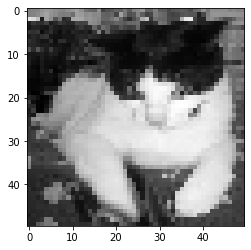

In [26]:
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0], cmap="gray")
plt.show()